<a href="https://colab.research.google.com/github/sgathai/dsc-data-serialization-lab/blob/master/Copy_of_simple_linear_regression_ipynb__William_lecture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from random import gauss
from scipy import stats
import seaborn as sns
from sklearn.linear_model import LinearRegression
from mpl_toolkits import mplot3d
import sklearn.metrics as metrics
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant

%matplotlib inline

In [ ]:
#dataset
X = [1, 3, 5]
Y = [2, 9, 10]

In [ ]:
type(X)

list

In [ ]:
data = pd.DataFrame({'X':X, 'Y':Y})
data

,X,Y
0,1,2
1,3,9
2,5,10


In [ ]:
data.X.mean()

3.0

In [ ]:
data.Y.mean()

7.0

In [ ]:
# Covariance
#cov(X, Y) = Σ((xᵢ - μₓ)(yᵢ - μᵧ)) / (n - 1)
((1-3) * (2-7) + (3-3) * (9-7) + (5-3) * (10-7)) / 3-1

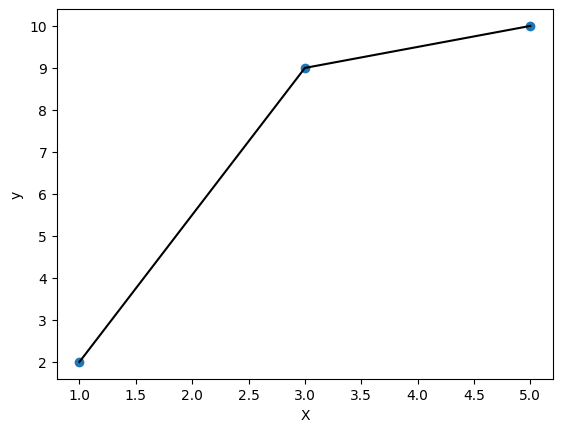

In [ ]:
#scatter plot
plt.scatter(X, Y)
plt.xlabel("X")
plt.ylabel("y")
plt.plot(X,Y, color='black');

In [ ]:
#creating dataset
x = np.arange(20)
y = 3*x +5

In [ ]:
type(x)

numpy.ndarray

In [ ]:
#creating a dataframe
df = pd.DataFrame({"x":x, "y":y})
df.head()

,x,y
0,0,5
1,1,8
2,2,11
3,3,14
4,4,17


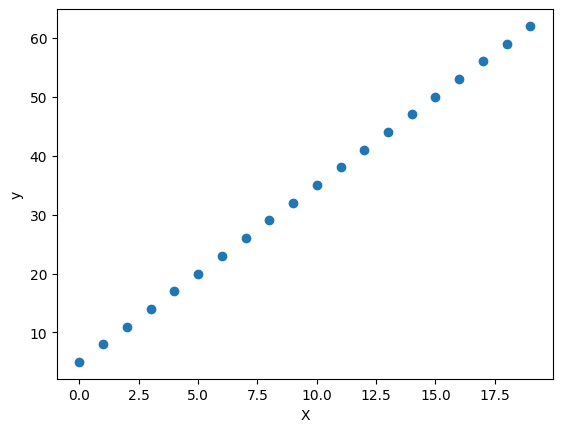

In [ ]:
#ploting scatter plot
plt.scatter(x, y)
plt.xlabel("X")
plt.ylabel("y");

In [ ]:
#checking coverance
#cov(X, Y) = Σ((xᵢ - μₓ)(yᵢ - μᵧ)) / (n - 1)
np.cov(x, y, ddof=0)[0]

array([33.25, 99.75])

In [ ]:
#checking correlation
#r = (Σ((xᵢ - μₓ)(yᵢ - μᵧ))) / (√((Σ(xᵢ - μₓ)²) * (Σ(yᵢ - μᵧ)²)))
stats.pearsonr(x, y)[0]

0.9999999999999999

In [ ]:
#Regression Without Error in statsmodels
#creating the model
model1 =sm.formula.ols(formula = "y ~ x", data = df).fit().summary()
model1

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.039e+32
Date:                Thu, 18 May 2023   Prob (F-statistic):          2.60e-278
Time:                        16:59:29   Log-Likelihood:                 622.92
No. Observations:                  20   AIC:                            -1242.
Df Residuals:                      18   BIC:                            -1240.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.0000   3.27e-15   1.53e+15      0.000       5.000       5.000
x              3.0000   2.94e-16   1.02e+16      0.000       3.000       3.000
==============================================================================
Omnibus:                       29.063   Durbin-Watson:                   0.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               45.473
Skew:                           2.667   Prob(JB):                     1.34e-10
Kurtosis:                       8.111   Cond. No.                         21.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#Regression with Error in statsmodels

#adding noise
x = np.arange(20)
y = np.array([3*pt + 5 + gauss(mu=0,sigma=5) for pt in x])

df2 = pd.DataFrame({'x':x, 'y':y})
df2.head(3)


,x,y
0,0,3.473649
1,1,8.015177
2,2,9.104948


In [ ]:
## Calculating the line of best fit
coefficients = np.polyfit(df2['x'], df2['y'], 1)
slope = coefficients[0]
print("slope",slope)
intercept = coefficients[1]
print("inttercept",intercept)
line_of_best_fit =intercept + slope * df2['x'] 


slope 3.292920504075103
inttercept 2.286788342395218


In [ ]:
coefficients

array([3.2929205 , 2.28678834])

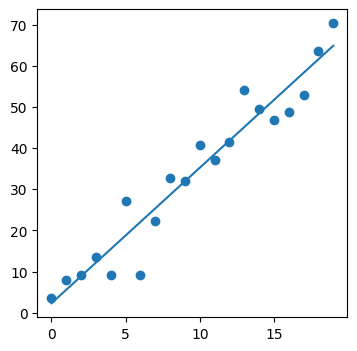

In [ ]:
#scatter plot/incoperating line of best_fit
plt.figure(figsize=(4,4))
plt.scatter(x,y)
plt.plot(line_of_best_fit);



In [ ]:
#calling and creating the model
model = sm.OLS(endog=y,exog=x).fit() # you can use sm.formula.ols too... model = sm.formula.ols(formula='y~x', data=df2).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.981
Model:                            OLS   Adj. R-squared (uncentered):              0.980
Method:                 Least Squares   F-statistic:                              984.6
Date:                Thu, 18 May 2023   Prob (F-statistic):                    7.83e-18
Time:                        17:18:58   Log-Likelihood:                         -61.939
No. Observations:                  20   AIC:                                      125.9
Df Residuals:                      19   BIC:                                      126.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             3.4688      0.111     31.379      0.000       3.237       3.700
==============================================================================
Omnibus:                        0.750   Durbin-Watson:                   2.118
Prob(Omnibus):                  0.687   Jarque-Bera (JB):                0.609
Skew:                          -0.387   Prob(JB):                        0.737
Kurtosis:                       2.637   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

####Fitted Model Attributes and Methods

In [ ]:
#t_statistics
model.tvalues

array([31.37912963])

In [ ]:
#p value
model.pvalues

array([7.82946047e-18])

In [ ]:
#adding constant
# Add a constant term to the predictor variables/feature
x_1 = sm.add_constant(x)

In [ ]:
model = sm.OLS(y,x_1).fit() # you can use sm.formula.ols too... model = sm.formula.ols(formula='y~x', data=df2).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     238.0
Date:                Thu, 18 May 2023   Prob (F-statistic):           8.05e-12
Time:                        17:35:25   Log-Likelihood:                -61.436
No. Observations:                  20   AIC:                             126.9
Df Residuals:                      18   BIC:                             128.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.2868      2.372      0.964      0.348      -2.697       7.270
x1             3.2929      0.213     15.427      0.000       2.844       3.741
==============================================================================
Omnibus:                        1.213   Durbin-Watson:                   2.229
Prob(Omnibus):                  0.545   Jarque-Bera (JB):                0.581
Skew:                          -0.417   Prob(JB):                        0.748
Kurtosis:                       2.995   Cond. No.                         21.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""